# 05_딥러닝_성능개선_예제

# 코딩 패턴

1. 데이터셋 불러오기 (loading)
2. 데이터셋 전처리 작업
3. tf.data.Dataset을 구성 (train, validation, test dataset)
4. 모델을 구성
5. 모델 컴파일 - optimizer, loss function, metrics 설정
6. 모델 학습(training)
7. 최종 평가

In [1]:
# import 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
def plot_result(hist, loss_min=None, loss_max=None):
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(hist.epoch, hist.history['loss'], label="train")
    plt.plot(hist.epoch, hist.history['val_loss'], label='validation')
    plt.title('Loss')
    if loss_min != None and loss_max != None:
        plt.ylim(loss_min, loss_max)
        
    plt.xlabel('에폭수')
    plt.ylabel('loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(hist.epoch, hist.history['accuracy'], label='train')
    plt.plot(hist.epoch, hist.history['val_accuracy'], label='validation')
    plt.title('Accuracy')
    plt.xlabel('에폭수')
    plt.ylabel('accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [3]:
# MNIST 데이터셋 로딩
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

# 전처리 - X: scaling y: one hot encoding 정리
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

X_train = train_image.astype('float32')/255
X_test = test_image.astype('float32')/255

print(y_train.shape, y_test.shape)
print(X_train.dtype, X_train.dtype)

(60000, 10) (10000, 10)
float32 float32


In [4]:
# 하이퍼파라미터
LEARNING_RATE = 0.001
N_EPOCH = 20
N_BATCH = 1000

In [5]:
# Dataset 생성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(60000).batch(N_BATCH, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCH)

print(len(train_dataset), len(test_dataset))

60 10


# 모델의 크기 변경 &rarr; 성능 확인

In [6]:
def get_small_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28))) # Input layer + flatten layer
    model.add(layers.Dense(10, activation='softmax', name='output_layer')) # output layer
    
    model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
                 loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
small_model = get_small_model()
small_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 output_layer (Dense)        (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
hist = small_model.fit(train_dataset, epochs=N_EPOCH, validation_data=test_dataset)

Epoch 1/20
60/60 [==============================] - 2s 11ms/step - loss: 1.4339 - accuracy: 0.6403 - val_loss: 0.8678 - val_accuracy: 0.8320
Epoch 2/20
60/60 [==============================] - 1s 7ms/step - loss: 0.7303 - accuracy: 0.8438 - val_loss: 0.5933 - val_accuracy: 0.8702
Epoch 3/20
60/60 [==============================] - 1s 7ms/step - loss: 0.5606 - accuracy: 0.8680 - val_loss: 0.4902 - val_accuracy: 0.8853
Epoch 4/20
60/60 [==============================] - 1s 7ms/step - loss: 0.4826 - accuracy: 0.8809 - val_loss: 0.4343 - val_accuracy: 0.8928
Epoch 5/20
60/60 [==============================] - 1s 8ms/step - loss: 0.4369 - accuracy: 0.8888 - val_loss: 0.3995 - val_accuracy: 0.8998
Epoch 6/20
60/60 [==============================] - 1s 8ms/step - loss: 0.4058 - accuracy: 0.8950 - val_loss: 0.3751 - val_accuracy: 0.9034
Epoch 7/20
60/60 [==============================] - 1s 8ms/step - loss: 0.3837 - accuracy: 0.8990 - val_loss: 0.3574 - val_accuracy: 0.9069
Epoch 8/20
60/60 [=

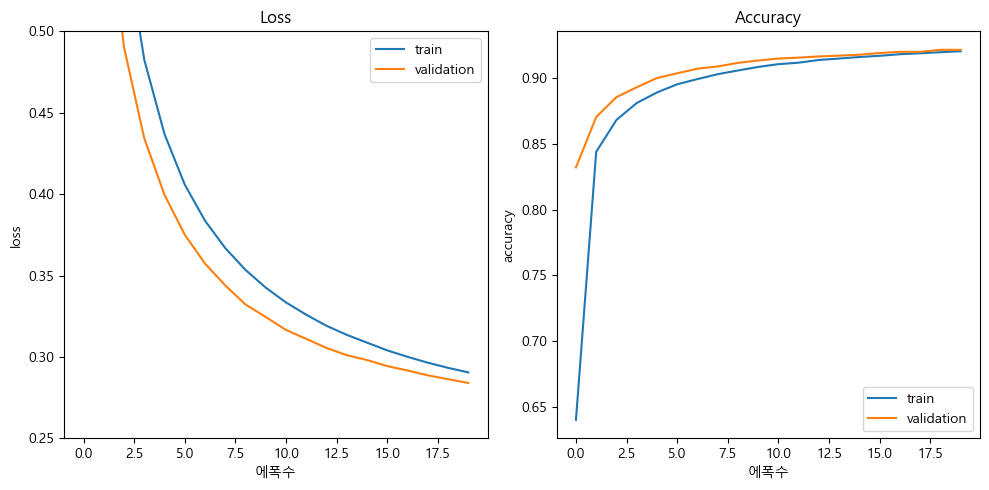

In [9]:
# 시각화
plot_result(hist, 0.25, 0.5)

> - 성능이 천천히 개선 되가고 있지만 train과 validation의 값이 거의 차이가 안나는 것을 확인할 수 있다.
>    - 과대적합 X

-----------

In [10]:
def get_big_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28))) # Input layer + flatten layer
    # hidden layer 추가
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    
    model.add(layers.Dense(10, activation='softmax', name='output_layer')) # output layer
    
    model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
                 loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
big_model = get_big_model()
big_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 128)              

In [12]:
hist = big_model.fit(train_dataset, epochs=N_EPOCH, validation_data=test_dataset)

Epoch 1/20
60/60 [==============================] - 7s 70ms/step - loss: 0.6647 - accuracy: 0.7772 - val_loss: 0.1881 - val_accuracy: 0.9445
Epoch 2/20
60/60 [==============================] - 4s 63ms/step - loss: 0.1559 - accuracy: 0.9530 - val_loss: 0.1249 - val_accuracy: 0.9631
Epoch 3/20
60/60 [==============================] - 4s 63ms/step - loss: 0.0946 - accuracy: 0.9719 - val_loss: 0.0975 - val_accuracy: 0.9701
Epoch 4/20
60/60 [==============================] - 4s 64ms/step - loss: 0.0625 - accuracy: 0.9816 - val_loss: 0.0869 - val_accuracy: 0.9735
Epoch 5/20
60/60 [==============================] - 4s 63ms/step - loss: 0.0511 - accuracy: 0.9844 - val_loss: 0.0783 - val_accuracy: 0.9767
Epoch 6/20
60/60 [==============================] - 4s 64ms/step - loss: 0.0348 - accuracy: 0.9893 - val_loss: 0.0792 - val_accuracy: 0.9764
Epoch 7/20
60/60 [==============================] - 4s 63ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0916 - val_accuracy: 0.9744
Epoch 8/20
60

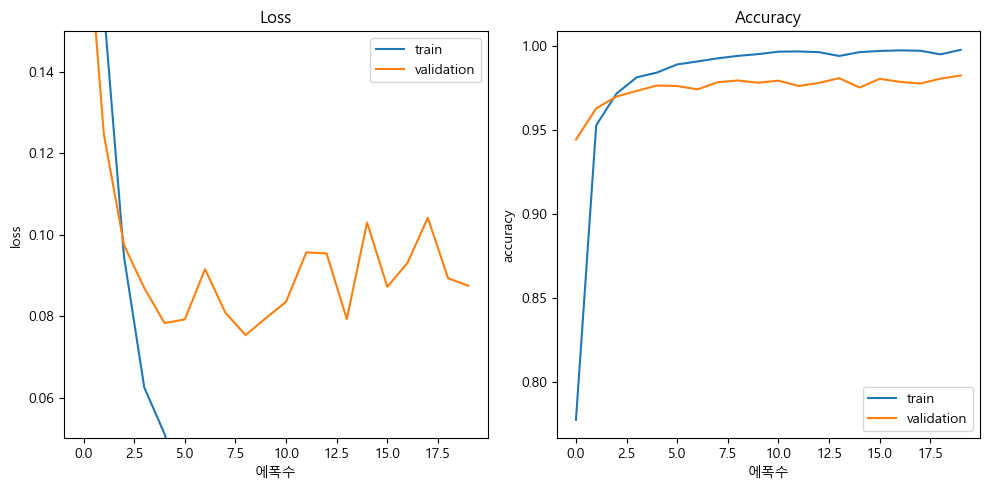

In [13]:
# 시각화
plot_result(hist, 0.05, 0.15)

> - 좋아졌다 나빠지는 상황이 발생한다 -> 과대 적합

In [14]:
print(small_model.evaluate(test_dataset))
print(big_model.evaluate(test_dataset))

10/10 [==============================] - 0s 6ms/step - loss: 0.2840 - accuracy: 0.9212
[0.28402024507522583, 0.9211999773979187]
10/10 [==============================] - 0s 25ms/step - loss: 0.0875 - accuracy: 0.9827
[0.08749505132436752, 0.982699990272522]


# Dropout Layer

In [15]:
# Dropout Layer는 Dropout을 설정하려는 Layer 앞에 먼저 정의한다.
def get_dropout_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28))) # Input layer + flatten layer
    # hidden layer 추가
    model.add(layers.Dropout(rate=0.5)) # drop out 노드의 비율을 지정
    model.add(layers.Dense(512, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax', name='output_layer')) # output layer
    
    model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
                 loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [16]:
dropout_model = get_dropout_model()
dropout_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)              

In [17]:
hist = dropout_model.fit(train_dataset, epochs=N_EPOCH, validation_data=test_dataset)

Epoch 1/20
60/60 [==============================] - 10s 100ms/step - loss: 2.3148 - accuracy: 0.1182 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/20
60/60 [==============================] - 6s 97ms/step - loss: 2.2171 - accuracy: 0.1900 - val_loss: 2.1183 - val_accuracy: 0.2125
Epoch 3/20
60/60 [==============================] - 6s 101ms/step - loss: 2.0170 - accuracy: 0.2444 - val_loss: 1.8435 - val_accuracy: 0.3009
Epoch 4/20
60/60 [==============================] - 6s 95ms/step - loss: 1.8125 - accuracy: 0.3010 - val_loss: 1.7088 - val_accuracy: 0.3255
Epoch 5/20
60/60 [==============================] - 6s 95ms/step - loss: 1.6841 - accuracy: 0.3397 - val_loss: 1.6902 - val_accuracy: 0.3204
Epoch 6/20
60/60 [==============================] - 6s 95ms/step - loss: 1.5590 - accuracy: 0.3788 - val_loss: 1.4739 - val_accuracy: 0.3708
Epoch 7/20
60/60 [==============================] - 6s 96ms/step - loss: 1.4309 - accuracy: 0.4087 - val_loss: 1.2587 - val_accuracy: 0.4845
Epoch 8/20

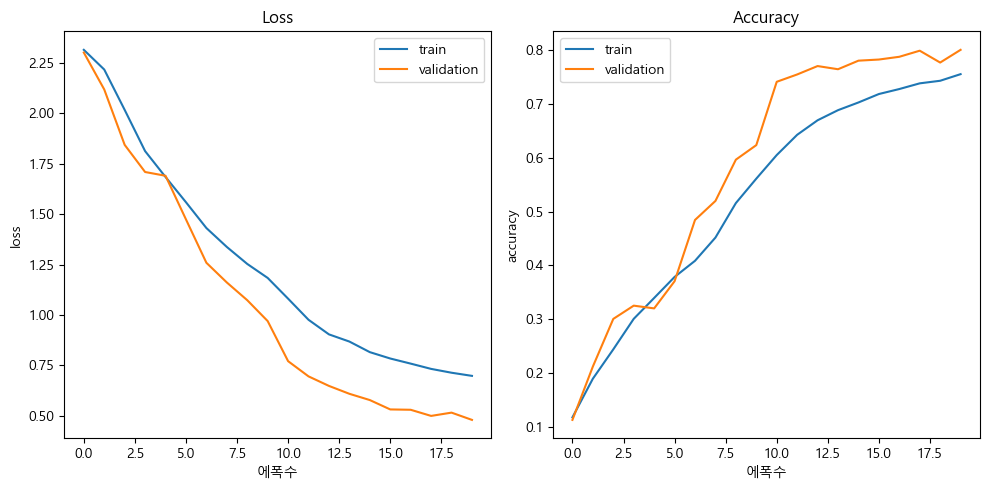

In [18]:
plot_result(hist)

# Batch Normalization 예제

In [19]:
def get_model_bn(lr=0.01):
    
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    
    # Hidden layer 배치 순서
    # (Dropout Layer ->) Dense Layer -> Batch Normalization -> ReLU(Activation)
    model.add(layers.Dense(256))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(256))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    # output layer
    model.add(layers.Dense(10))
    model.add(layers.Softmax())
#     model.add(layers.Activation('sigmoid'))  # sigmoid일때 activation을 가지고 문자열로 표기할 수 있다. -> softmax와 relu 도 가능
    
    # 컴파일
    model.compile(optimizer=optimizers.Adam(learning_rate=lr),
                 loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [20]:
model_bn = get_model_bn(LEARNING_RATE)
model_bn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [21]:
hist = model_bn.fit(train_dataset, epochs=N_EPOCH, validation_data=test_dataset)

Epoch 1/20
60/60 [==============================] - 7s 45ms/step - loss: 0.4210 - accuracy: 0.8820 - val_loss: 0.8836 - val_accuracy: 0.9446
Epoch 2/20
60/60 [==============================] - 2s 38ms/step - loss: 0.1039 - accuracy: 0.9717 - val_loss: 0.3355 - val_accuracy: 0.9634
Epoch 3/20
60/60 [==============================] - 2s 37ms/step - loss: 0.0576 - accuracy: 0.9845 - val_loss: 0.1550 - val_accuracy: 0.9699
Epoch 4/20
60/60 [==============================] - 3s 40ms/step - loss: 0.0323 - accuracy: 0.9924 - val_loss: 0.0965 - val_accuracy: 0.9742
Epoch 5/20
60/60 [==============================] - 2s 39ms/step - loss: 0.0193 - accuracy: 0.9961 - val_loss: 0.0815 - val_accuracy: 0.9754
Epoch 6/20
60/60 [==============================] - 2s 38ms/step - loss: 0.0108 - accuracy: 0.9986 - val_loss: 0.0732 - val_accuracy: 0.9772
Epoch 7/20
60/60 [==============================] - 2s 37ms/step - loss: 0.0070 - accuracy: 0.9991 - val_loss: 0.0700 - val_accuracy: 0.9772
Epoch 8/20
60

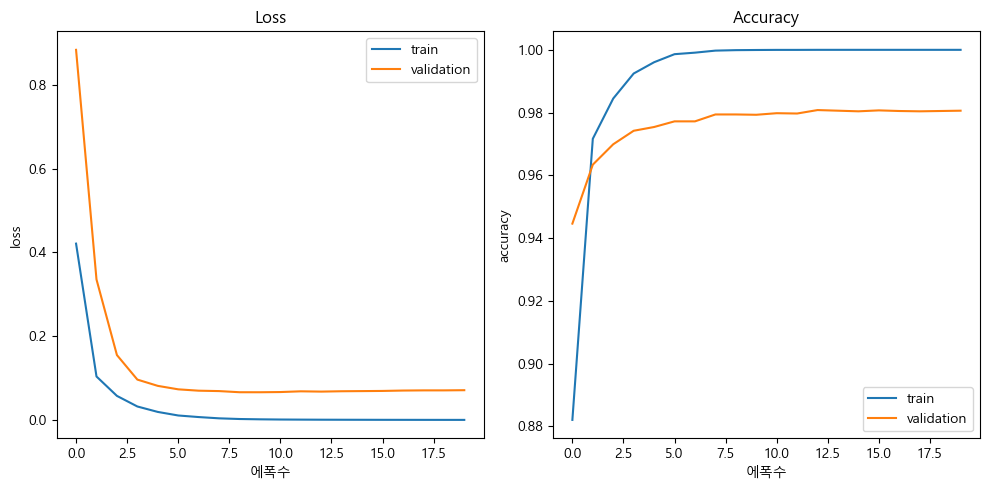

In [22]:
plot_result(hist)

# Learning Rate 변화를 통한 성능 개선

## Learning Rate scheduler 를 이용
- 특정 steop 마다 learning rate를 변경

```python
# len(train_dataset) : 1에폭당 step수
lr_scheduler = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE, # 시작(초기) 학습률
    decay_step = len(train_dataset)*5,  # 몇 step마다 변경할 것인지 그 간격 ex) 5 -> 다섯스탭마다 변경
    decay_rate=0.5, # 변화율 -> 현재 학습율 * recay => 새로운 학습율
    staircase = True # decay_step때 한번에 변경할 것인지(True), 매 step마다 조금씩 변경할 것인지(False) 여부
)
# learning rate scheduler를 Optimizer의 Learning rate에 설정
```

In [29]:
def get_model_lr(initial_lr = 0.01):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax', name='output_layer'))
    
    lr_sch = optimizers.schedules.ExponentialDecay(initial_learning_rate=initial_lr,
                                                  decay_steps=len(train_dataset)*5,
                                                  decay_rate = 0.5,
                                                  staircase=True)
    
    model.compile(optimizer= optimizers.Adam(learning_rate=lr_sch), # Learning rate scheduler를 학습률로 지정
                 loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [30]:
model_lr = get_model_lr(LEARNING_RATE)
hist = model_lr.fit(train_dataset, epochs=N_EPOCH, validation_data=test_dataset)

Epoch 1/20
60/60 [==============================] - 3s 24ms/step - loss: 0.6507 - accuracy: 0.8187 - val_loss: 0.2350 - val_accuracy: 0.9319
Epoch 2/20
60/60 [==============================] - 1s 20ms/step - loss: 0.2000 - accuracy: 0.9426 - val_loss: 0.1644 - val_accuracy: 0.9498
Epoch 3/20
60/60 [==============================] - 1s 20ms/step - loss: 0.1412 - accuracy: 0.9591 - val_loss: 0.1236 - val_accuracy: 0.9630
Epoch 4/20
60/60 [==============================] - 1s 20ms/step - loss: 0.1109 - accuracy: 0.9673 - val_loss: 0.1097 - val_accuracy: 0.9672
Epoch 5/20
60/60 [==============================] - 1s 20ms/step - loss: 0.0915 - accuracy: 0.9717 - val_loss: 0.0969 - val_accuracy: 0.9707
Epoch 6/20
60/60 [==============================] - 1s 20ms/step - loss: 0.0679 - accuracy: 0.9804 - val_loss: 0.0850 - val_accuracy: 0.9739
Epoch 7/20
60/60 [==============================] - 1s 20ms/step - loss: 0.0601 - accuracy: 0.9828 - val_loss: 0.0813 - val_accuracy: 0.9756
Epoch 8/20
60

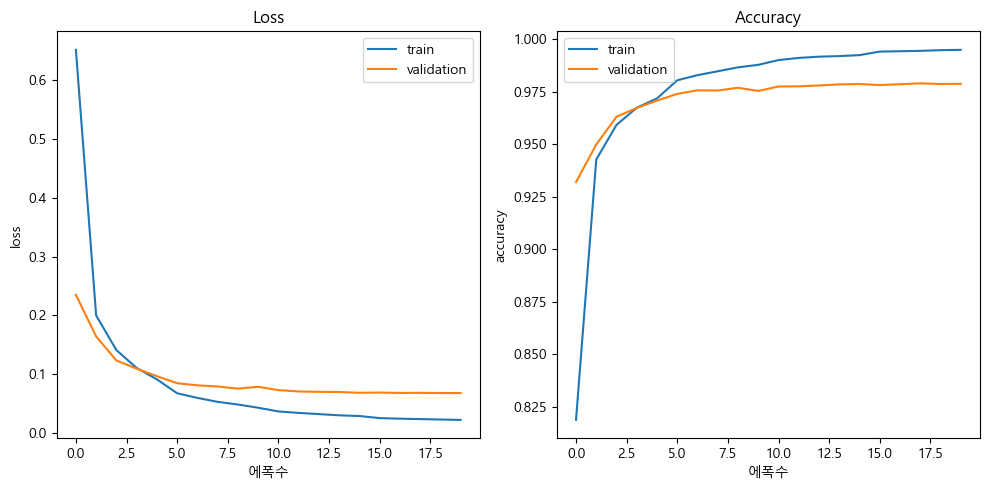

In [33]:
plot_result(hist)

## callback을 이용해 학습률 변경
- ReduceLROnPlateau callback 이용

```python
tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', # 검증지표 (기본값: val_loss)
                                     factor = 0.5, # 변화율: 현재 학습율 + factor = 새학습률 (기본값: 0.1)
                                     patience= 5, # 성능이 개선되는지 확인하는 에폭수(기본값: 10) - 지정한 에폭동안 성능개선이 안되면 학습률을 변경
                                     verbose=2,   # 학습률이 변경될 때마다 로그를 출력
                                     mode='auto' # 성능개선이 값이 커지는 것인지 작아지는 것이 개선인지 지정, 'min', 'max', 'auto'(기본)
                                     )
```

In [37]:
def get_model_lr2(initial_lr = 0.01):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax', name='output_layer'))
    
    model.compile(optimizer= optimizers.Adam(learning_rate=initial_lr), # Learning rate scheduler를 학습률로 지정
                 loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [38]:
model_lr2 = get_model_lr2(LEARNING_RATE)

In [39]:
lr_callback = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                               factor=0.5,
                                               patience=3, # 보통 5 ~ 10 번 정도 잡아줌 -> epoch수가 작아서 3을 잡아줌
                                               verbose=2   # 학습률이 변경될 때마다 로그를 출력
                                               )
hist = model_lr2.fit(train_dataset, epochs=N_EPOCH+10, validation_data=test_dataset,
             callbacks=[lr_callback])

Epoch 1/30
60/60 [==============================] - 3s 24ms/step - loss: 0.6379 - accuracy: 0.8316 - val_loss: 0.2450 - val_accuracy: 0.9270 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 1s 20ms/step - loss: 0.2078 - accuracy: 0.9404 - val_loss: 0.1681 - val_accuracy: 0.9499 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 1s 20ms/step - loss: 0.1478 - accuracy: 0.9581 - val_loss: 0.1356 - val_accuracy: 0.9609 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 1s 20ms/step - loss: 0.1188 - accuracy: 0.9651 - val_loss: 0.1197 - val_accuracy: 0.9640 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 1s 20ms/step - loss: 0.0914 - accuracy: 0.9732 - val_loss: 0.1023 - val_accuracy: 0.9682 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 1s 21ms/step - loss: 0.0742 - accuracy: 0.9778 - val_loss: 0.0970 - val_accuracy: 0.9720 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 2s 22ms/step - loss: 0.0

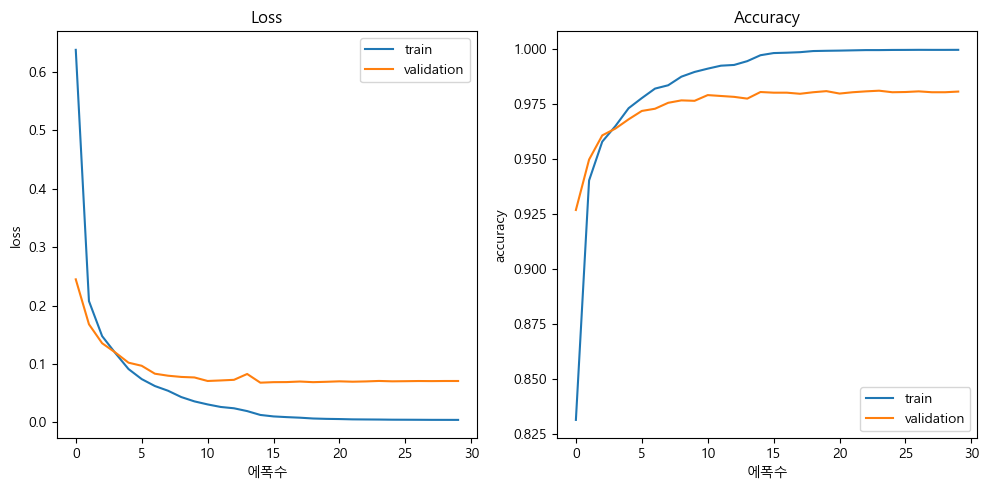

In [40]:
plot_result(hist)